<a href="https://colab.research.google.com/github/Saadman/tensorflow2.0_projects/blob/master/Icecream_sales_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 48kB/s 
     |████████████████████████████████| 3.0MB 41.9MB/s 
     |████████████████████████████████| 419kB 62.3MB/s 


# STEP #0: IMPORT LIBRARIES

In [2]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sc


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

# STEP #1: IMPORT DATASET

In [4]:
# import CSV file entitled "SalesData.csv"
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sales_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/tensorflow2/data/IceCreamSalesData.csv")

In [6]:
sales_data.head(5,)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
sales_data.tail(10,)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [13]:
sales_data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP #2: VISUALIZE DATASET

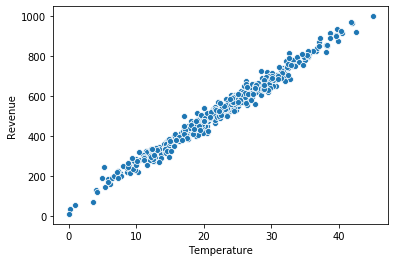

In [15]:
sns.scatterplot(sales_data['Temperature'],sales_data['Revenue'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [0]:
X_train=sales_data['Temperature'][:400,]
y_train=sales_data['Revenue'][:400,]


In [19]:
X_train.shape

(400,)

In [20]:
X_test=sales_data['Temperature'][400:,]
y_test=sales_data['Revenue'][400:,]
X_test.shape

(100,)

# STEP#4: BUILD AND TRAIN THE MODEL

In [0]:
model_ice=tf.keras.Sequential()
#model_ice.add(tf.keras.layers.Dense(units=10,input_shape=[1]))
#model_ice.add(tf.keras.layers.Dense(5))
#model_ice.add(tf.keras.layers.Dense(1))
model_ice.add(tf.keras.layers.Dense(units=1,input_shape=[1]))


In [51]:
model_ice.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_ice.compile(tf.keras.optimizers.Adam(0.3),loss="mean_squared_error")

In [53]:
model_hist=model_ice.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
400/400 [==============================] - 0s 244us/sample - loss: 241910.2800
Epoch 2/1000
400/400 [==============================] - 0s 81us/sample - loss: 160629.5912
Epoch 3/1000
400/400 [==============================] - 0s 91us/sample - loss: 99153.9888
Epoch 4/1000
400/400 [==============================] - 0s 84us/sample - loss: 57310.8219
Epoch 5/1000
400/400 [==============================] - 0s 71us/sample - loss: 30904.7183
Epoch 6/1000
400/400 [==============================] - 0s 70us/sample - loss: 15370.4475
Epoch 7/1000
400/400 [==============================] - 0s 68us/sample - loss: 7206.4968
Epoch 8/1000
400/400 [==============================] - 0s 76us/sample - loss: 3303.5776
Epoch 9/1000
400/400 [==============================] - 0s 73us/sample - loss: 1574.5021
Epoch 10/1000
400/400 [==============================] - 0s 94us/sample - loss: 930.2439
Epoch 11/1000
400/400 [==============================] - 0s 97us/sample - loss: 716.9805
Epoch 12/100

# STEP#5: EVALUATE THE MODEL 

In [54]:
model_hist.history.keys()

dict_keys(['loss'])

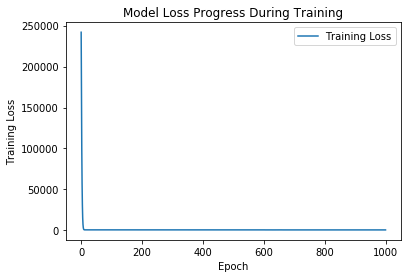

In [55]:
plt.plot(model_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [60]:
model_ice.get_weights()

[array([[21.2888]], dtype=float32), array([45.983753], dtype=float32)]

In [62]:
# Use the trained model to perform predictions

pred_value=model_ice.predict(X_test)
print(pred_value[1:5])
print(y_test[1:5])


[[868.3459  ]
 [ 45.983753]
 [564.3469  ]
 [603.08734 ]]
401    916.648613
402     10.000000
403    572.672047
404    658.600456
Name: Revenue, dtype: float64


Text(0.5, 1.0, 'Ice Cream revenue vs Temperature change')

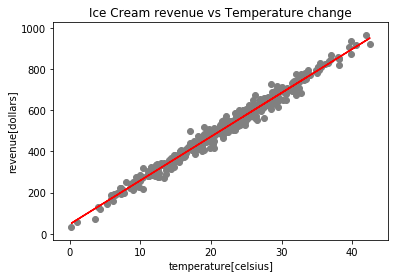

In [69]:
plt.plot(X_train,model_ice.predict(X_train),color='red')
plt.scatter(X_train,y_train,color='grey')
plt.xlabel("temperature[celsius]")
plt.ylabel("revenue[dollars]")
plt.title("Ice Cream revenue vs Temperature change")

# STEP #6: CONFIRM USING REGRESSION KIT IN SCIKIT LEARN

In [77]:
X_train.shape
X_train[0:5]

0    24.566884
1    26.005191
2    27.790554
3    20.595335
4    11.503498
Name: Temperature, dtype: float64

In [0]:
train_lrx=X_train.values.reshape(-1,1)

In [81]:
print(train_lrx.shape)


(400, 1)


In [0]:
train_lry=y_train.values.reshape(-1,1)

In [0]:
from sklearn.linear_model import LinearRegression


In [0]:
model_lr=LinearRegression()

In [0]:
lr_hist=model_lr.fit(train_lrx,train_lry)

In [90]:
print("Linear model coeffiecient(m):{}".format(lr_hist.coef_))
print("Linear model coeffiecient(b):{}".format(lr_hist.intercept_))

Linear model coeffiecient(m):[[21.35810169]]
Linear model coeffiecient(b):[46.02342275]


Text(0.5, 1.0, 'Ice Cream revenue vs Temperature change')

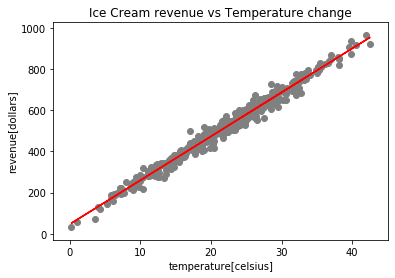

In [91]:
plt.plot(train_lrx,model_lr.predict(train_lrx),color='red')
plt.scatter(train_lrx,train_lry,color='grey')
plt.xlabel("temperature[celsius]")
plt.ylabel("revenue[dollars]")
plt.title("Ice Cream revenue vs Temperature change")